In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [141]:
data_fiscal=pd.read_csv("/Users/apoorvakasoju/Downloads/Sdf16_1a.txt",sep="\t")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [142]:
data_fiscal.head(10)

,LEAID,CENSUSID,FIPST,CONUM,CSA,CBSA,NAME,STNAME,STABBR,SCHLEV,...,FL_61V,FL_66V,FL_W01,FL_W31,FL_W61,FL_V95,FL_V02,FL_K14,FL_CE1,FL_CE2
0,100002,N,1,01073,142,13820,Alabama Youth Services,Alabama,AL,N,...,M,M,M,M,M,M,M,M,M,M
1,100005,01504840100000,1,01095,290,10700,Albertville City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
2,100006,01504800100000,1,01095,290,10700,Marshall County,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
3,100007,01503740100000,1,01073,142,13820,Hoover City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
4,100008,01504530100000,1,01089,290,26620,Madison City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
5,100009,N,1,01121,142,45180,Al Inst Deaf And Blind,Alabama,AL,N,...,N,N,N,N,N,N,N,N,N,N
6,100011,01503710100000,1,01073,142,13820,Leeds City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
7,100012,01504810100000,1,01095,290,10700,Boaz City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
8,100013,01503710200000,1,01073,142,13820,Trussville City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
9,100015,N,1,01073,142,13820,SafetyNet Academy,Alabama,AL,N,...,N,N,N,N,N,N,N,N,N,N


In [143]:
data_fiscal_revenue=data_fiscal.groupby(['STNAME'])['TFEDREV'].sum().reset_index().sort_values('TFEDREV', ascending=False)

In [144]:
data_fiscal_revenue.head(10)

,STNAME,TFEDREV
4,California,7709274795
43,Texas,6194316950
32,New York,3374793578
9,Florida,3147328988
13,Illinois,2334944853
38,Pennsylvania,2037314939
35,Ohio,1837962930
10,Georgia,1815241986
22,Michigan,1731033937
33,North Carolina,1587975932


In [145]:
def plot_bar_x(data_fiscal_revenue):
    state_labels=data_fiscal_revenue["STNAME"].tolist()
    index = np.arange(len(state_labels[:10]))

    plt.bar(index, data_fiscal_revenue["TFEDREV"].tolist()[:10])
    plt.xlabel('State', fontsize=15)
    plt.ylabel('Federal Revenue', fontsize=15)
    plt.xticks(index, state_labels[:10], fontsize=10, rotation=30)
    plt.title('Ranking of State by Federal Revenue')
    plt.show()

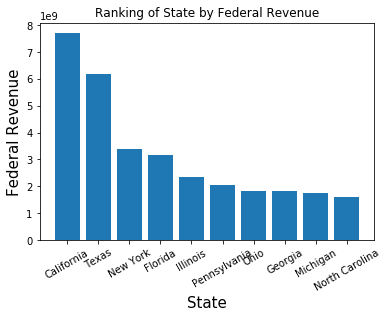

In [146]:
plot_bar_x(data_fiscal_revenue)

#Anlaysis states such as California , Texas,New York ,Florida receive high federal revenue 

In [134]:
data_fiscal_revenue_per_student=data_fiscal.groupby(['STNAME']).agg({'TFEDREV': 'sum', 'V33': 'sum'}).reset_index()

In [135]:
data_fiscal_revenue_per_student["revenue_per_student"]=data_fiscal_revenue_per_student["TFEDREV"]/data_fiscal_revenue_per_student["V33"]

In [136]:
data_fiscal_revenue_per_student.sort_values('revenue_per_student', ascending=False,inplace=True)

In [140]:
data_fiscal_revenue_per_student.head(10)

,STNAME,TFEDREV,V33,revenue_per_student
8,District of Columbia,226201985,83369,2713.262544
1,Alaska,307320000,132477,2319.798908
18,Louisiana,1115618894,718498,1552.709811
31,New Mexico,516288985,335690,1537.993342
26,Montana,220339869,145100,1518.538036
41,South Dakota,196643958,134023,1467.240384
11,Hawaii,261131000,181995,1434.825133
34,North Dakota,155452961,108530,1432.350143
24,Mississippi,690723968,487154,1417.876006
39,Rhode Island,188203996,141796,1327.287060


In [137]:
def plot_bar_xy(data_fiscal_revenue,y_label,x_label,title,x_title,y_title):
    state_labels=data_fiscal_revenue[x_label].tolist()
    index = np.arange(len(state_labels[:10]))

    plt.bar(index, data_fiscal_revenue[y_label].tolist()[:10])
    plt.xlabel(x_title, fontsize=15)
    plt.ylabel(y_title, fontsize=15)
    plt.xticks(index, state_labels[:10], fontsize=10, rotation=30)
    plt.title(title)
    plt.show()

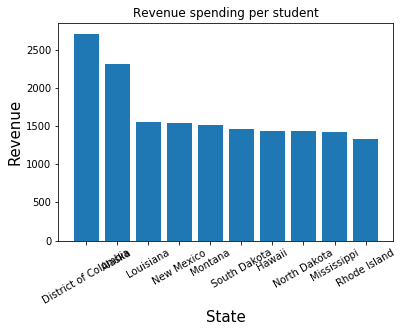

In [138]:
plot_bar_xy(data_fiscal_revenue_per_student,"revenue_per_student",'STNAME',"Revenue spending per student","State","Revenue")

#Analysis: We can see that states such as District of columbia,Lousiana,New Mexica have highest revenue spending per student.
For columbia , this result is in part due to less student count compared to other top performing states in this aspect

**Problem 2**

In [75]:
data_fiscal_rev_exp = data_fiscal[(data_fiscal.TOTALREV >= 0) & (data_fiscal.TOTALEXP >= 0)][['TOTALREV','TOTALEXP','LEAID','STABBR']]


In [76]:
data_fiscal_rev_exp.head(10)

,TOTALREV,TOTALEXP,LEAID,STABBR
1,49795000,46778000,100005,AL
2,56422000,64739000,100006,AL
3,168040000,165436000,100007,AL
4,105927000,101154000,100008,AL
6,27699000,32285000,100011,AL
7,22813000,22413000,100012,AL
8,47842000,65049000,100013,AL
21,32454000,29642000,100030,AL
36,18650000,15978000,100060,AL
37,23776000,24320000,100090,AL


In [78]:
data_fiscal_rev_exp_g=data_fiscal_rev_exp.groupby(['LEAID']).agg({'TOTALEXP': 'sum', 'TOTALREV': 'sum'}).reset_index().sort_values('TOTALREV',ascending=False)

In [79]:
data_fiscal_rev_exp_g.head(10)

,LEAID,TOTALEXP,TOTALREV
12685,3620580,29620098000,27448356000
1679,622710,9686165000,10329380000
9428,1709930,5963039000,5272668000
8686,1200390,3654722000,3590773000
5265,3200060,3081183000,3220684000
6266,4218990,2824311000,3030964000
8957,1500030,2733094000,3030519000
2001,2400480,2699290000,2898647000
16289,5101260,2911340000,2733933000
8679,1200180,2652891000,2607068000


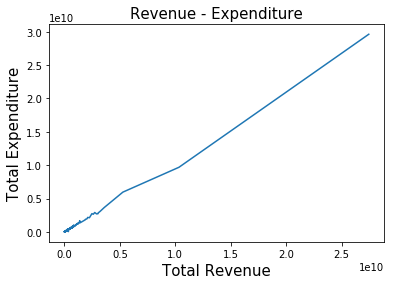

In [82]:
plt.plot(data_fiscal_rev_exp_g['TOTALREV'], data_fiscal_rev_exp_g['TOTALEXP'])
plt.ylabel('Total Expenditure',fontsize=15)
plt.xlabel('Total Revenue',fontsize=15)
plt.title('Revenue - Expenditure',fontsize=15)
plt.show()

#Analysis: We can see that Revenue expenditure relationship is linear which means that as revenue grows,expenditure is also growing proportionally

**Most debt per student**

As data cleaning procedure,I have included only those with total revenue and expenditure greater than zero

In [93]:

data_fiscal_debt=data_fiscal[(data_fiscal.TOTALREV >= 0) & (data_fiscal.TOTALEXP >= 0)][['TOTALREV','TOTALEXP','STNAME','V33']]
data_fiscal_debt_g=data_fiscal_debt.groupby(['STNAME'],as_index=False).agg({'TOTALEXP': 'sum', 'TOTALREV': 'sum','V33':'sum'})
data_fiscal_debt_g['debt_per_student']=(data_fiscal_debt_g['TOTALREV']-data_fiscal_debt_g['TOTALEXP'])/data_fiscal_debt_g['V33']
data_fiscal_debt_g.sort_values('debt_per_student',ascending=False,inplace=True)

In [94]:
data_fiscal_debt_g.head(10)

,STNAME,TOTALEXP,TOTALREV,V33,debt_per_student
11,Hawaii,2733094000,3030519000,181995,1634.248194
6,Connecticut,10985762000,11552645000,512461,1106.197350
14,Indiana,12001326000,13143063000,1045066,1092.502292
22,Michigan,19461509000,20863260000,1486088,943.248987
4,California,85327525000,89224004000,6203495,628.110283
12,Idaho,2212651000,2382012000,292082,579.840593
21,Massachusetts,17675778000,18177253000,961325,521.649806
19,Maine,2773125000,2861888000,180278,492.367344
20,Maryland,13992191000,14409321000,879196,474.444834
2,Arizona,9482835000,9980177000,1096992,453.368849


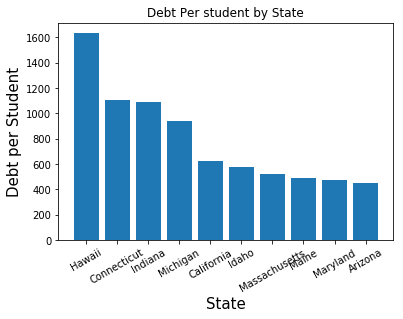

In [96]:
plot_bar_xy(data_fiscal_debt_g,'debt_per_student','STNAME','Debt Per student by State','State','Debt per Student')

#Analysis :We can see that state like Hawaii,Connecticut,Michigan and Indiaina have high Debt per student

**Problem 3**

In [99]:
#

data_eda_math=pd.read_csv("/Users/apoorvakasoju/Downloads/math-achievement-lea-sy2015-16.csv",sep=",")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [100]:
data_eda_math.head(10)

,STNAM,FIPST,LEAID,LEANM,DATE_CUR,ALL_MTH00NUMVALID_1516,ALL_MTH00PCTPROF_1516,MAM_MTH00NUMVALID_1516,MAM_MTH00PCTPROF_1516,MAS_MTH00NUMVALID_1516,...,MIG_MTH05NUMVALID_1516,MIG_MTH05PCTPROF_1516,MIG_MTH06NUMVALID_1516,MIG_MTH06PCTPROF_1516,MIG_MTH07NUMVALID_1516,MIG_MTH07PCTPROF_1516,MIG_MTH08NUMVALID_1516,MIG_MTH08PCTPROF_1516,MIG_MTHHSNUMVALID_1516,MIG_MTHHSPCTPROF_1516
0,ALABAMA,1,100005,Albertville City,14APR17,2638,42,5,PS,12,...,28,LE20,16,LE20,19,21-39,20,LE20,8,LT50
1,ALABAMA,1,100006,Marshall County,14APR17,3003,39,16,21-39,13,...,6,LT50,4,PS,4,PS,4,PS,2,PS
2,ALABAMA,1,100007,Hoover City,14APR17,7356,66,8,GE50,515,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALABAMA,1,100008,Madison City,14APR17,5482,72,30,60-79,501,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALABAMA,1,100011,Leeds City,14APR17,1024,37,1,PS,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ALABAMA,1,100012,Boaz City,14APR17,1229,43,6,LT50,12,...,2,PS,4,PS,2,PS,1,PS,NaN,NaN
6,ALABAMA,1,100013,Trussville City,14APR17,2464,69,4,PS,54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,ALABAMA,1,100030,Alexander City,14APR17,1553,43,NaN,NaN,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,ALABAMA,1,100060,Andalusia City,14APR17,916,37,NaN,NaN,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,ALABAMA,1,100090,Anniston City,14APR17,929,21,1,PS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
data_eda_math['MAM_MTH00PCTPROF_1516'].unique().tolist()

['PS',
 '21-39',
 'GE50',
 '60-79',
 'LT50',
 nan,
 '40-59',
 '45-49',
 'LE20',
 '35-39',
 '46',
 '40-44',
 '50-54',
 '30-39',
 '57',
 '39',
 '25-29',
 '21',
 '.',
 '10-14',
 '20-29',
 'LE10',
 '20-24',
 '11-19',
 '30-34',
 '6-9',
 '32',
 '22',
 '40-49',
 '15-19',
 '17',
 '11',
 '20',
 '18',
 '12',
 '27',
 '24',
 'LE5',
 '5',
 '8',
 '9',
 '14',
 '23',
 '19',
 '15',
 '10',
 '50-59',
 '90-94',
 '56',
 '3',
 '38',
 '55-59',
 'LE1',
 '85-89',
 '31',
 '60-64',
 'GE90',
 '65-69',
 'GE80',
 '28',
 '60-69',
 '4',
 '58',
 '70-79',
 '43',
 '70-74',
 '26',
 '80-89',
 '53',
 '75-79',
 '37',
 '33',
 '25',
 '29',
 '7',
 '16',
 '6',
 '35',
 '68',
 '61',
 '74',
 '80-84',
 '65',
 '79',
 '77',
 '84',
 '76',
 '63',
 '66',
 '60',
 '78',
 '44',
 '81',
 '73',
 '67',
 '69',
 '45',
 '62',
 '72',
 '13']

In [175]:
def process_blurr(df,col):
    for index,row in df.iterrows():
        if row[col]=="nan":
            df.loc[index,col]=np.nan
        elif row[col]==".":
            df.loc[index,col]=np.nan
        elif str(row[col]).find("-")!=-1:
            val=str(row[col])
            df.loc[index,col]=np.mean(list(map(float,val.split("-"))))
        elif str(row[col]).find("GE")!=-1:
            val=str(row[col])
            df.loc[index,col]=np.float(val.replace("GE",''))
    
        elif str(row[col]).find("LE")!=-1:
            val=str(row[col])
            df.loc[index,col]=np.float(val.replace("LE",''))
        elif str(row[col]).find("LT")!=-1:
            val=str(row[col])
            df.loc[index,col]=np.float(val.replace("LT",''))
        elif str(row[col]).find("GT")!=-1:
            val=str(row[col])
            df.loc[index,col]=np.float(val.replace("LT",''))
        elif str(row[col]).find("PS")!=-1:
            df.loc[index,col]=np.nan
        else:
            df.loc[index,col]=np.float(row[col])

In [176]:
process_blurr(data_eda_math,'MAM_MTH00PCTPROF_1516')

In [186]:
len(data_eda_math)

16237

In [178]:
import pandas as pd
from sklearn.impute import SimpleImputer

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [184]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
new_eda_math=pd.DataFrame(imp.fit_transform(data_eda_math["MAM_MTH00PCTPROF_1516"].values.reshape(1,-1)))

In [189]:
data_eda_math["MAM_MTH00PCTPROF_1516"].fillna(data_eda_math["MAM_MTH00PCTPROF_1516"].mean(),inplace=True)

In [190]:
data_eda_math["MAM_MTH00PCTPROF_1516"].unique()

array([44.46395853, 30.        , 50.        , 69.5       , 49.5       ,
       47.        , 20.        , 37.        , 46.        , 42.        ,
       52.        , 34.5       , 57.        , 39.        , 27.        ,
       21.        , 12.        , 24.5       , 10.        , 22.        ,
       15.        , 32.        ,  7.5       , 44.5       , 17.        ,
       11.        , 18.        , 24.        ,  5.        ,  8.        ,
        9.        , 14.        , 23.        , 19.        , 54.5       ,
       92.        , 56.        ,  3.        , 38.        ,  1.        ,
       87.        , 31.        , 62.        , 90.        , 67.        ,
       80.        , 28.        , 64.5       ,  4.        , 58.        ,
       74.5       , 43.        , 72.        , 26.        , 84.5       ,
       53.        , 77.        , 33.        , 25.        , 29.        ,
        7.        , 16.        ,  6.        , 35.        , 68.        ,
       61.        , 74.        , 82.        , 65.        , 79.  

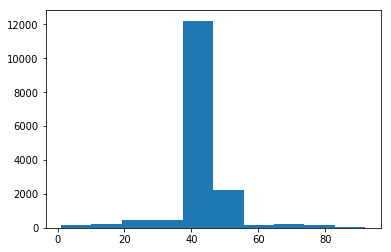

In [191]:
plt.hist(np.float64(data_eda_math['MAM_MTH00PCTPROF_1516']), bins=10)
plt.show()

**Problem 4 and 5**

In [106]:
#problem 4
print("Budget value is ",0.15*(data_fiscal['TFEDREV'].sum()))

Budget value is  8340410870.7


As part of data cleaning, I have included only those with federal revenuw greater than zero

In [129]:
data_fiscal_cut=data_fiscal[(data_fiscal.TFEDREV > 0)][['STNAME','LEAID',"TFEDREV"]]

In [130]:
data_fiscal_cut["cut"]=(data_fiscal_cut["TFEDREV"]/data_fiscal['TFEDREV'].sum())*8340410870.7
data_fiscal_cut["after_cut"]=data_fiscal_cut["TFEDREV"]-data_fiscal_cut["cut"]

In [133]:
data_fiscal_cut.sort_values(by=["cut"],ascending=False,inplace=True)
data_fiscal_cut[["LEAID","cut"]].head(100)

,LEAID,cut
11684,3620580,260865150.0
1904,622710,163710000.0
3850,1709930,118863000.0
3022,1200390,64727850.0
3038,1200870,46264050.0
16436,4823640,44093700.0
16242,4816230,43074150.0
3015,1200180,41743800.0
9784,3200060,41644200.0
15038,4218990,40705350.0


*** I think it is sensible to cut the revenue proportional to the federal revenue that each school district is receieving compared to the total amount of federal revenue.
Because uniform cut across all school districts in unfair as those school districts that are receiving less funding already might suffer with disproportionate revenue.***